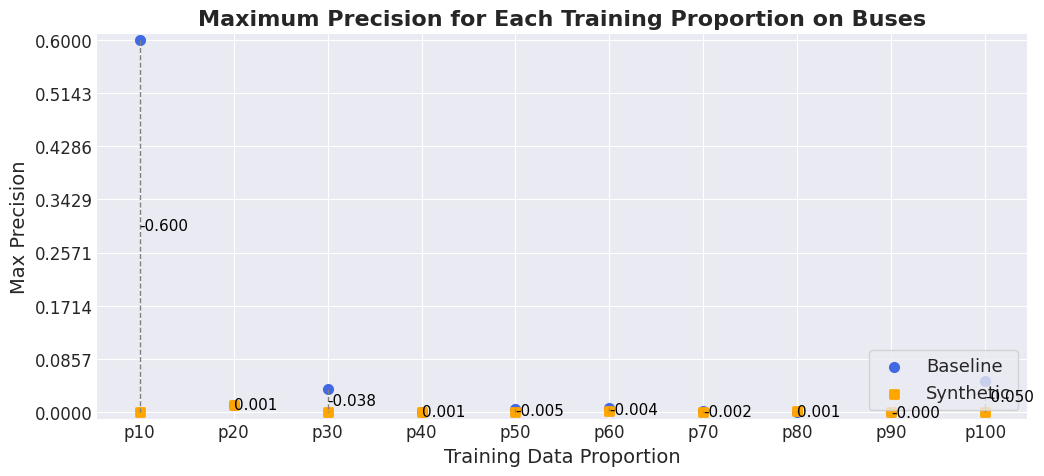

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Define the base directory and the p10...p100 subdirectories
base_dir_baseline = "runs/detect/only_bycicles_baseline_lr001/bdd_baseline_data"
base_dir_synth = "runs/detect/only_bycicles_synth_lr001/bdd_bycicle_synth_data"

p_dirs = [f"p{i}" for i in range(10, 101, 10)]

max_map50_values_base = []
max_map50_values_synth = []

def get_max_map50_value(csv_path):
    """
    Reads the CSV file and returns the maximum value of 'metrics/mAP50(B)'.
    If the column does not exist, returns NaN.
    """
    #metrics/mAP50-95(B)
    #metrics/mAP50(B)
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        if "metrics/precision(B)" in df.columns:
            return df["metrics/precision(B)"].max()
    return float('0')

for p_dir in p_dirs:
    csv_path_baseline = os.path.join(base_dir_baseline, p_dir, "results.csv")
    csv_path_synth = os.path.join(base_dir_synth, p_dir, "results.csv")
    
    # Check if the CSV file existp
    if os.path.exists(csv_path_baseline): 
        max_map50_values_base += [get_max_map50_value(csv_path_baseline)]
    else:
        max_map50_values_base += [.6]
                
    if os.path.exists(csv_path_synth):
        max_map50_values_synth += [get_max_map50_value(csv_path_synth)]        
    else:
        max_map50_values_synth += [.6]
plt.figure(figsize=(12, 5))

plt.style.use('seaborn-v0_8-darkgrid')

plt.scatter(p_dirs, max_map50_values_base, marker='o', label='Baseline', linewidth=2, color='royalblue')
plt.scatter(p_dirs, max_map50_values_synth, marker='s', label='Synthetic', linewidth=2, color='orange')
plt.ylim(
    min(min(max_map50_values_base), min(max_map50_values_synth)) - 0.01,
    max(max(max_map50_values_base), max(max_map50_values_synth)) + 0.01
)
plt.xlabel("Training Data Proportion", fontsize=14)
plt.ylabel("Max Precision", fontsize=14)
plt.title(f"Maximum Precision for Each Training Proportion on Buses", fontsize=16, weight='bold')
plt.xticks(fontsize=12)
map50_diffs = np.array(max_map50_values_synth) - np.array(max_map50_values_base)
# Draw vertical lines and annotate the difference for each bin
for i, (x, y_base, y_synth, diff) in enumerate(zip(p_dirs, max_map50_values_base, max_map50_values_synth, map50_diffs)):
    # Draw vertical line
    plt.plot([x, x], [y_base, y_synth], color='gray', linestyle='--', linewidth=1)
    # Annotate the difference
    y_mid = (y_base + y_synth) / 2
    plt.text(
        x, y_mid, f"{diff:.3f}",
        ha='left', va='center',
        fontsize=11, color='black', zorder=10
    )

plt.yticks(
    np.round(np.linspace(
        min(min(max_map50_values_base), min(max_map50_values_synth)),
        max(max(max_map50_values_base), max(max_map50_values_synth)),
        num=8
    ), 4),
    fontsize=12
)
#plt.yticks([round(x, 2) for x in np.arange(0.38, 0.60, 0.02)], fontsize=12)
plt.legend(fontsize=13, loc='lower right', frameon=True)
#plt.tight_layout()

"""
plt.figure(figsize=(12, 7))
plt.plot(p_dirs, max_map50_values_base, marker='o')
plt.plot(p_dirs, max_map50_values_synth, marker='o')

plt.xlabel("Directory")
plt.ylabel("Max MAP50")
plt.title("Maximum MAP50 for each p10...p100 directory")
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.yticks([round(x, 2) for x in list(np.arange(0, 0.41, 0.02))])"""
plt.show()


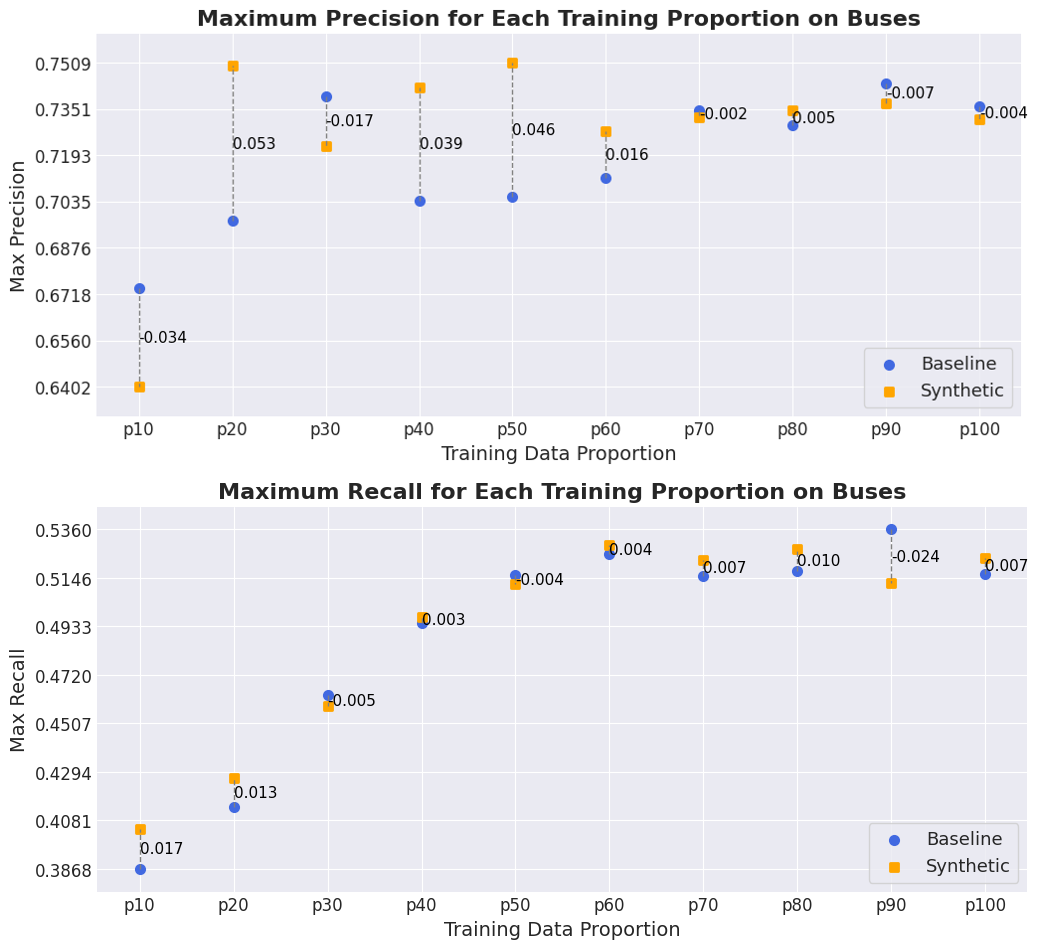

In [26]:
from PIL import Image

# Read the images
img1 = Image.open("maxprec_buses.png")
img2 = Image.open("max_recall_buses.png")

# Ensure both images have the same width
if img1.width != img2.width:
    new_width = min(img1.width, img2.width)
    img1 = img1.resize((new_width, int(img1.height * new_width / img1.width)))
    img2 = img2.resize((new_width, int(img2.height * new_width / img2.width)))

# Create a new image with combined height
combined_height = img1.height + img2.height
combined_img = Image.new("RGB", (img1.width, combined_height))

# Paste the images one below the other
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

# Save or display the combined image
combined_img.save("max_precision_recall_motorcycles_combined.png")
combined_img.show()